In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Direct Sequence Sread Spectrum 


## What is Spread Spectrum

Consider two one-shot rectangular pulses with times $T_{sym}$ and $T_{chip}$. Assume that $T_{sym} = N * T_{chip}$. Both these pulses will have a sinc Fourier transform, but the shorter puls will have a wider Bandwidth then the loner one. In fact we can see that the bandwidth will be $N$ times wider for the short pulse. 

The Simulation below shows how the Fourier Transform of the long pulse has $N$ times the magnutude while being $N$ times smaller bandwidth then the short pulse. 

In we can seee the short pulse as having a *spread* spectrum compared to the long pulse. This spreading is the fundamental idea behind DSSS. The question now is how we can come up with a modulation technique that can take a long pulse and spread its spectrum over a larger bandwidth. 

Text(0.5, 1.0, 'Long and Short Rect Pulses')

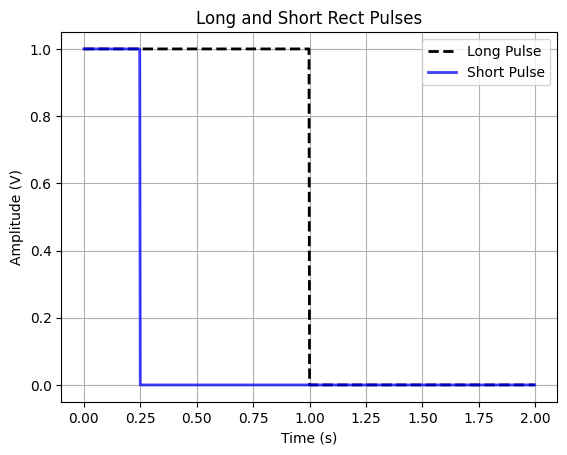

In [35]:
T_sym = 1

N = 4
T_chip = T_sym / N

fs = 100* (1/T_chip)
t = np.arange(0, 2*T_sym, 1/fs)

p1 = np.hstack((np.ones(int(T_sym*fs)), np.zeros(int(T_sym*fs))))
p2 = np.hstack((np.ones(int(T_chip*fs)), np.zeros(int((2*T_sym-T_chip)*fs))))

plt.plot(t, p1, 'k--', linewidth=2, alpha = 1.0, label='Long Pulse')
plt.plot(t, p2, 'b', linewidth=2, alpha=0.75, label='Short Pulse')
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.title('Long and Short Rect Pulses')

Text(0.5, 1.0, 'Long and Short Pulse Fourier Transform')

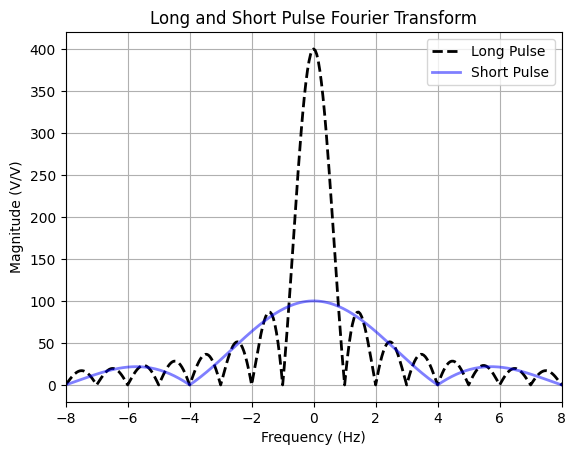

In [36]:
fft_len = 10*t.size
f_norm = np.arange(-0.5, 0.5, 1/fft_len)
f = f_norm * fs

p1_f = np.fft.fftshift(np.fft.fft(p1, fft_len))
p2_f = np.fft.fftshift(np.fft.fft(p2, fft_len))

plt.plot(f, np.abs(p1_f), 'k--', linewidth=2, alpha=1.0, label='Long Pulse')
plt.plot(f, np.abs(p2_f), 'b', linewidth=2, alpha=0.5, label='Short Pulse')
plt.legend()
plt.grid()
plt.xlim([-2/T_chip, 2/T_chip])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (V/V)')
plt.title('Long and Short Pulse Fourier Transform')

# Spreding the Spectrum with a Chipping Sequence